In [1]:
using IFSintegrals, Plots;

Set the physical problem parameters:

In [2]:
Γ = CantorSet() # scattering obstacle
k = 20 # wavenumber
d = [1 1]/sqrt(2); # incident wave direction

Set the problem parameters:

In [3]:
h_bem = 0.005 # meshwidth for BEM
h_quad = 0.001; # meshwidth for quadrature

Approximate the problem as a BIE and solve:

In [4]:
S = SingleLayer(Γ, k) # BIO
Sh = DiscreteBIO(S,h_bem,h_quad) # discretised BIO
f(x) = exp(im*k*(d[1]*x[1])) # RHS data
ϕ = Sh\f; # discrete solution

Now plot the solution

In [5]:
uⁱ(x) = exp.(im*k*(x*d'))[:]
h=0.01 # adujust this for more acurate / faster plots
x_1 = [j for j=-1:h:2]
x_2 = [j for j=-1:h:1]
X_1 = repeat(x_1, outer=(1,length(x_2)))
X_2 = copy(transpose(repeat(x_2, outer=(1,length(x_1)))))
N = length(x_1)*length(x_2)
X = [reshape(X_1, (N,)) reshape(X_2, (N,))]
uˢ = - single_layer_potential(Γ,k,ϕ,X)
uᵗ = uⁱ(X) + uˢ
vals = reshape(uᵗ,(length(x_1),length(x_2)));

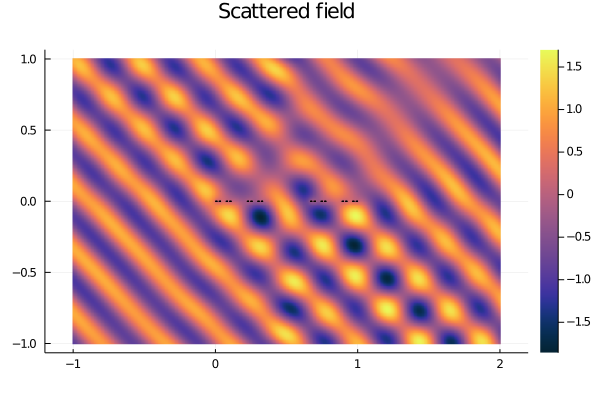

In [6]:
X = sketch_attractor(Γ; mem_const = 200)
heatmap(x_1,x_2,transpose(real(uᵗ)),  aspect_ratio = 1, 
    title="Scattered field", legend=true, c = :thermal)
scatter!(X,zeros(length(X)),legend=:false,markerstrokewidth=0, markersize=0.1, markercolor="black")